# Loan Prediction

#### Main aim of the project is that predict loan status for customer based on customer's information

## Steps to build model

#### 1) Data Collection
#### 2) Data Understanding
#### 3) Data Manipulation
#### 4) Data Visualization
#### 5) Build and Evaluate model 

## Problem Statements

#### 1) Visualize and calculate counts of married status of customers.
#### 2) Calculate and Visualize counts of Graduate and UnderGraduate applicants.
#### 3) Counts of customers who are self-employed and who are not self-employed.
#### 4) Counts of applicants who lives in urban, semi-urban and rural areas.
#### 5) Counts of credit history status of customers.
#### 6) Counts of members who are dependent on applicant.
#### 7) Visualize Loan amount of customer along with terms of Loan amount in days.

## So Lets Start !

## Import required Libraries

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score
import warnings
warnings.filterwarnings('ignore')

### Step 1 : Data Collection

In [196]:
df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [197]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
372,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56.0,180.0,1.0,Semiurban,Y
46,LP001206,Male,Yes,3+,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y
150,LP001807,Male,Yes,2,Graduate,Yes,6250,1300.0,108.0,360.0,1.0,Rural,Y
206,LP002055,Female,No,0,Graduate,No,3166,2985.0,132.0,360.0,NaN,Rural,Y
119,LP001671,Female,Yes,0,Graduate,No,3416,2816.0,113.0,360.0,NaN,Semiurban,Y
262,LP002332,Male,Yes,0,Not Graduate,No,2253,2033.0,110.0,360.0,1.0,Rural,Y
31,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
270,LP002366,Male,Yes,0,Graduate,No,2666,4300.0,121.0,360.0,1.0,Rural,Y
33,LP001138,Male,Yes,1,Graduate,No,5649,0.0,44.0,360.0,1.0,Urban,Y
228,LP002180,Male,No,0,Graduate,Yes,6822,0.0,141.0,360.0,1.0,Rural,Y


### Step 2 : Data Understanding

In [198]:
# Get all details about each features of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


#### Information about each features
###### Loan_ID: A unique loan ID.
###### Gender: Either male or female.
###### Married: Weather Married(yes) or Not Married(No).
###### Dependents: Number of persons depending on the client.
###### Education: Applicant Education(Graduate or Undergraduate).
###### Self_Employed: Self-employed (Yes/No).
###### ApplicantIncome: Applicant income.
###### CoapplicantIncome: Co-applicant income.
###### LoanAmount: Loan amount in thousands.
###### Loan_Amount_Term: Terms of the loan in months.
###### Credit_History: Credit history meets guidelines.
###### Property_Area: Applicants are living either Urban, Semi-Urban or Rural.
###### Loan_Status: Loan approved (Y/N).

In [199]:
# Get the total counts of rows and columns of dataset
df.size

4953

In [200]:
# Get the number of rows and columns.
df.shape

(381, 13)

In [201]:
# Check unique values
df.apply(lambda col : col.unique())

Loan_ID              [LP001003, LP001005, LP001006, LP001008, LP001...
Gender                                             [Male, Female, nan]
Married                                                      [Yes, No]
Dependents                                          [1, 0, 2, 3+, nan]
Education                                     [Graduate, Not Graduate]
Self_Employed                                           [No, Yes, nan]
ApplicantIncome      [4583, 3000, 2583, 6000, 2333, 3200, 2500, 185...
CoapplicantIncome    [1508.0, 0.0, 2358.0, 1516.0, 700.0, 1840.0, 2...
LoanAmount           [128.0, 66.0, 120.0, 141.0, 95.0, 70.0, 109.0,...
Loan_Amount_Term     [360.0, 120.0, 240.0, nan, 180.0, 60.0, 300.0,...
Credit_History                                         [1.0, nan, 0.0]
Property_Area                                [Rural, Urban, Semiurban]
Loan_Status                                                     [N, Y]
dtype: object

In [202]:
# Check null or missing values
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [203]:
# Check duplicate values
df.duplicated().sum()

0

In [204]:
# Checking outliers using descriptive analysis
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


### What you understand by your Data?
#### i) Dataset contain 381 rows and 13 coulmns.
#### ii) Total size of dataset is 4953.
#### iii) There are null or missing values in 'Gender','Dependents','Self Employed','Loan Amount Term','Credit History' features. Hence, need to manipulate.
#### iv) Descriptive status is fine. After data manipulation we need to check descriptive status again.
#### v) There is no duplicate rows and columns
#### vi) Here there are no outliers.

### Step 3:  Data Manipulation

#### Perform manipulation on Gender features.

In [205]:
# Check null values in Gender.
df['Gender'].isnull().sum()

5

In [206]:
df['Gender'].value_counts()

Gender
Male      291
Female     85
Name: count, dtype: int64

In [207]:
# Imputing mode value of Gender
df['Gender'].fillna('Male',inplace = True)

In [208]:
df['Gender'].isnull().sum()

0

#### Perform manipulation on Dependents features.

In [209]:
df['Dependents'].unique()

array(['1', '0', '2', '3+', nan], dtype=object)

In [210]:
df['Dependents'].value_counts()

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

In [211]:
# imputing mode value
df['Dependents'].fillna('0',inplace = True)

In [212]:
df['Dependents'].isnull().sum()

0

#### Perform manipulation on Self Employed features.

In [213]:
df['Self_Employed'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 381 entries, 0 to 380
Series name: Self_Employed
Non-Null Count  Dtype 
--------------  ----- 
360 non-null    object
dtypes: object(1)
memory usage: 3.1+ KB


In [214]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [215]:
df['Self_Employed'].value_counts()

Self_Employed
No     325
Yes     35
Name: count, dtype: int64

In [216]:
df['Self_Employed'].isnull().sum()

21

In [217]:
# imputing mode value
df['Self_Employed'].fillna('No',inplace = True)

In [218]:
df['Self_Employed'].isnull().sum()

0

#### Perform manipulation on Credit History features.

In [219]:
df['Credit_History'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 381 entries, 0 to 380
Series name: Credit_History
Non-Null Count  Dtype  
--------------  -----  
351 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


In [220]:
df['Credit_History'].unique()

array([ 1., nan,  0.])

In [221]:
df['Credit_History'].value_counts()

Credit_History
1.0    294
0.0     57
Name: count, dtype: int64

In [222]:
# imputing mode value
df['Credit_History'].fillna(1.0,inplace = True)

In [223]:
df['Credit_History'].isnull().sum()

0

#### Perform manipulation on Loan Amount Term features.

In [224]:
df['Loan_Amount_Term'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 381 entries, 0 to 380
Series name: Loan_Amount_Term
Non-Null Count  Dtype  
--------------  -----  
370 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


In [225]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  84.,  12.,  36.])

In [226]:
df['Loan_Amount_Term'].isnull().sum()

11

In [227]:
# Less chances of outliers so impute mean value
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,381.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.850394
std,1419.813818,2340.818114,28.358464,68.549257,0.357154
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


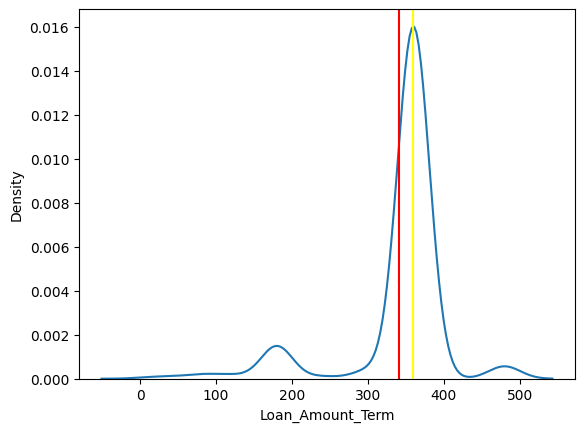

In [228]:
mean = df['Loan_Amount_Term'].mean()
med = df['Loan_Amount_Term'].median()
sns.distplot(df['Loan_Amount_Term'],hist = False)
plt.axvline(mean, c = 'red')
plt.axvline(med, c = 'yellow')
plt.show()

In [229]:
# Impute mean value
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace = True)

In [230]:
df['Loan_Amount_Term'].isnull().sum()

0

In [231]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Here all missing values imputed by mode and mean values

### Step 4 : Data Visualization

#### Problem Statements

#### i) Univariate Analysis

##### Visualize and calculate counts of married status of customers.

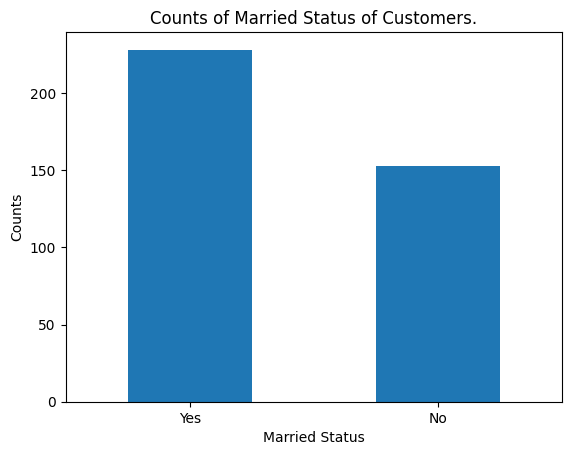

In [232]:
df['Married'].value_counts().plot(kind = 'bar')
plt.title('Counts of Married Status of Customers.')
plt.xlabel('Married Status')
plt.ylabel('Counts')
plt.xticks(rotation = 0)
plt.show()

In [233]:
df['Married'].value_counts()

Married
Yes    228
No     153
Name: count, dtype: int64

##### Calculate and Visualize counts of Graduate and UnderGraduate applicants.

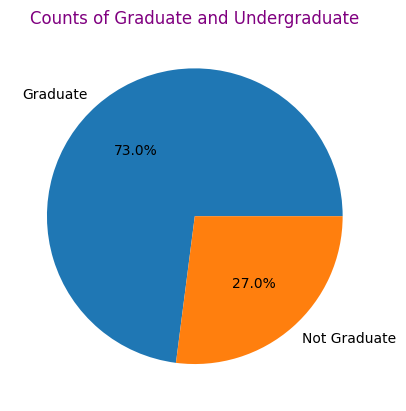

In [234]:
df['Education'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')
plt.title('Counts of Graduate and Undergraduate',color ='purple')
plt.ylabel('')
plt.show()

##### Counts of customers who are self-employed and who are not self-employed.

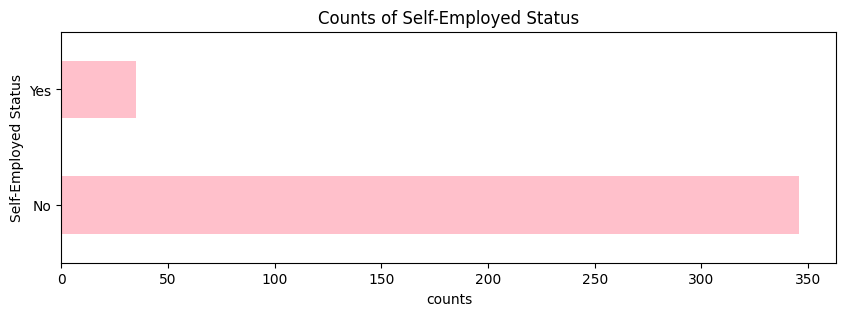

In [235]:
plt.figure(figsize = [10,3])
df['Self_Employed'].value_counts().plot(kind = 'barh',color = 'pink')
plt.title('Counts of Self-Employed Status')
plt.xlabel('counts')
plt.ylabel('Self-Employed Status')
plt.show()

##### Counts of applicants who lives in urban, semi-urban and rural areas.

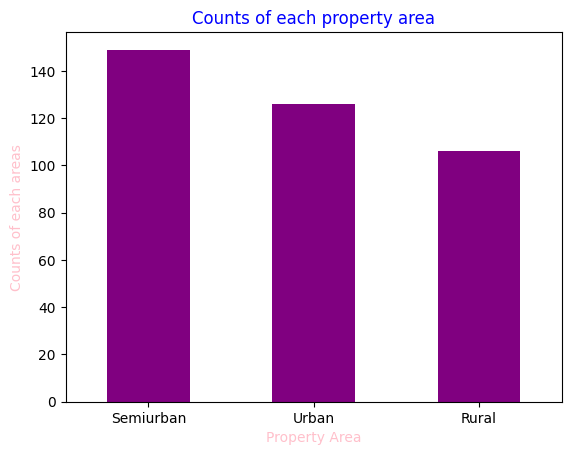

In [236]:
df['Property_Area'].value_counts().plot(kind = 'bar',color = 'purple')
plt.title('Counts of each property area',color = 'blue')
plt.xlabel('Property Area',color = 'pink')
plt.ylabel('Counts of each areas',color = 'pink')
plt.xticks(rotation = 0)
plt.show()

##### Counts of credit history status of customers.

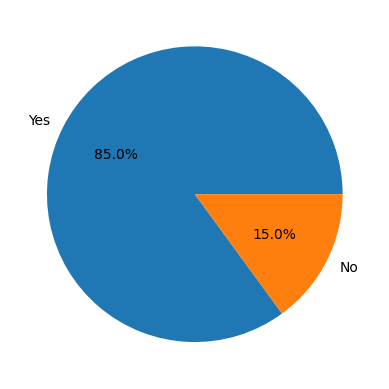

In [237]:
df['Credit_History'].apply(lambda x : f'Yes' if x == 1.0 else  f'No').value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel('')
plt.show()

##### Counts of members who are dependent on applicant.

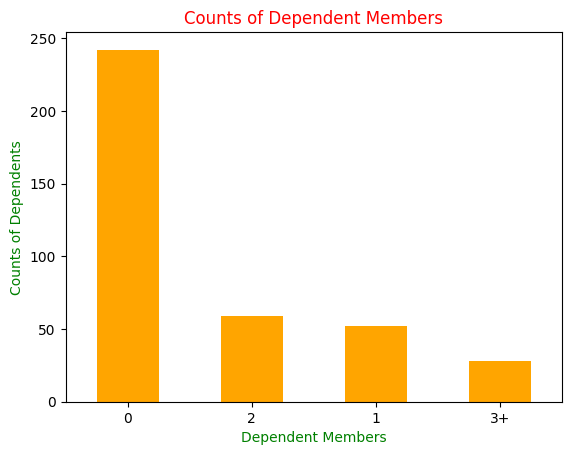

In [238]:
df['Dependents'].value_counts().plot(kind = 'bar',color = 'orange')
plt.title('Counts of Dependent Members',color = 'red')
plt.xlabel('Dependent Members',color = 'green')
plt.ylabel('Counts of Dependents',color = 'green')
plt.xticks(rotation = 0)
plt.show()

#### ii) Bivariate Analysis

##### Visualize Loan amount of customer along with terms of Loan amount in days.

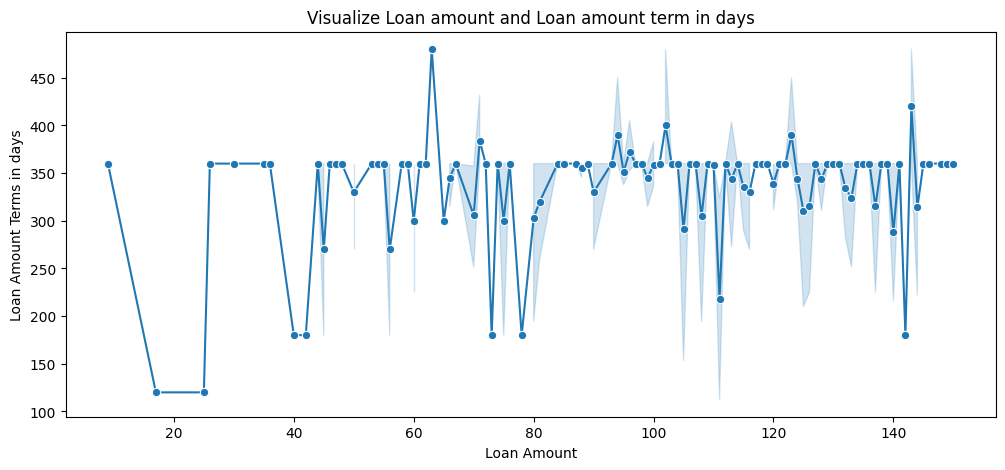

In [239]:
plt.figure(figsize = [12,5])
sns.lineplot(data = df,x = 'LoanAmount',y = 'Loan_Amount_Term',marker = 'o')
plt.title('Visualize Loan amount and Loan amount term in days')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Amount Terms in days')
plt.show()

#### Perform Encoding

In [240]:
# Split dataset in numerical and categorical
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes(include = ['int','float'])

In [241]:
# Transform Categorical variables into numerical values
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [242]:
# Combine Categorical and Numerical data
df = pd.concat([df_num,df_cat],axis = 1)

In [243]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0
1,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,1,2,1
2,2583,2358.0,120.0,360.0,1.0,2,1,1,0,1,0,2,1
3,6000,0.0,141.0,360.0,1.0,3,1,0,0,0,0,2,1
4,2333,1516.0,95.0,360.0,1.0,4,1,1,0,1,0,2,1


#### iii) Multivariate Analysis

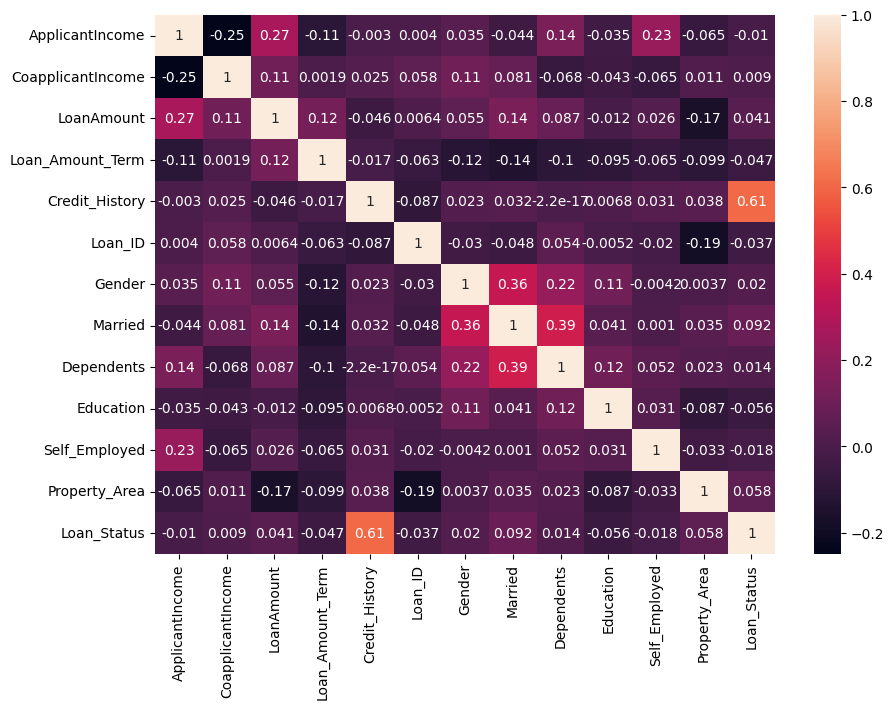

In [244]:
corr = df.corr()
plt.figure(figsize = [10,7])
sns.heatmap(corr,annot = True)
plt.show()

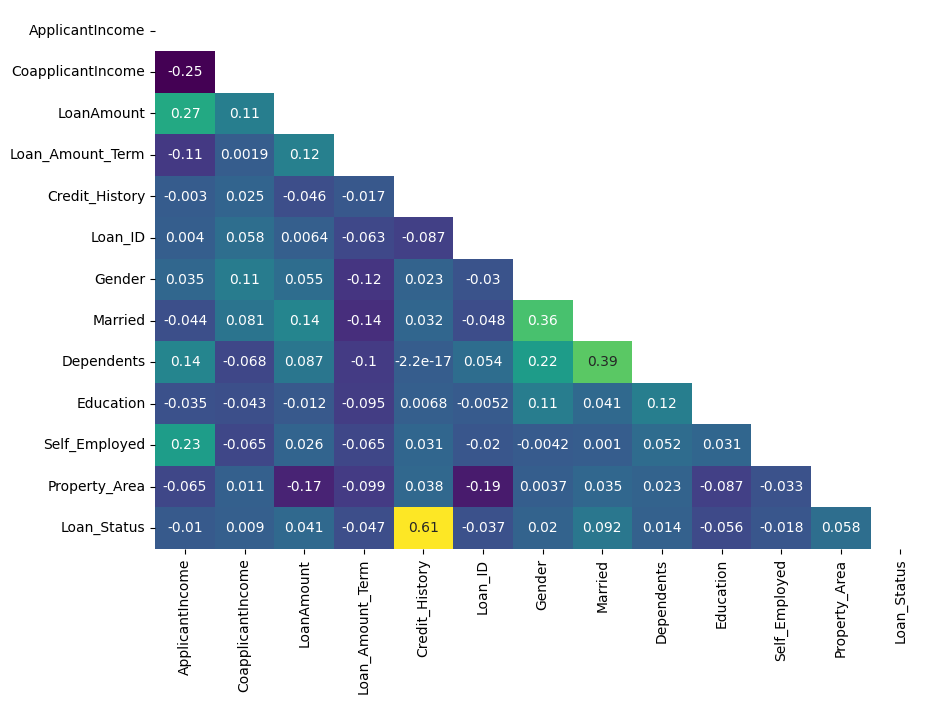

In [245]:
corr = df.corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize = [10,7])
sns.heatmap(corr,annot = True,mask = mask,cmap = 'viridis',cbar = False)
plt.show()

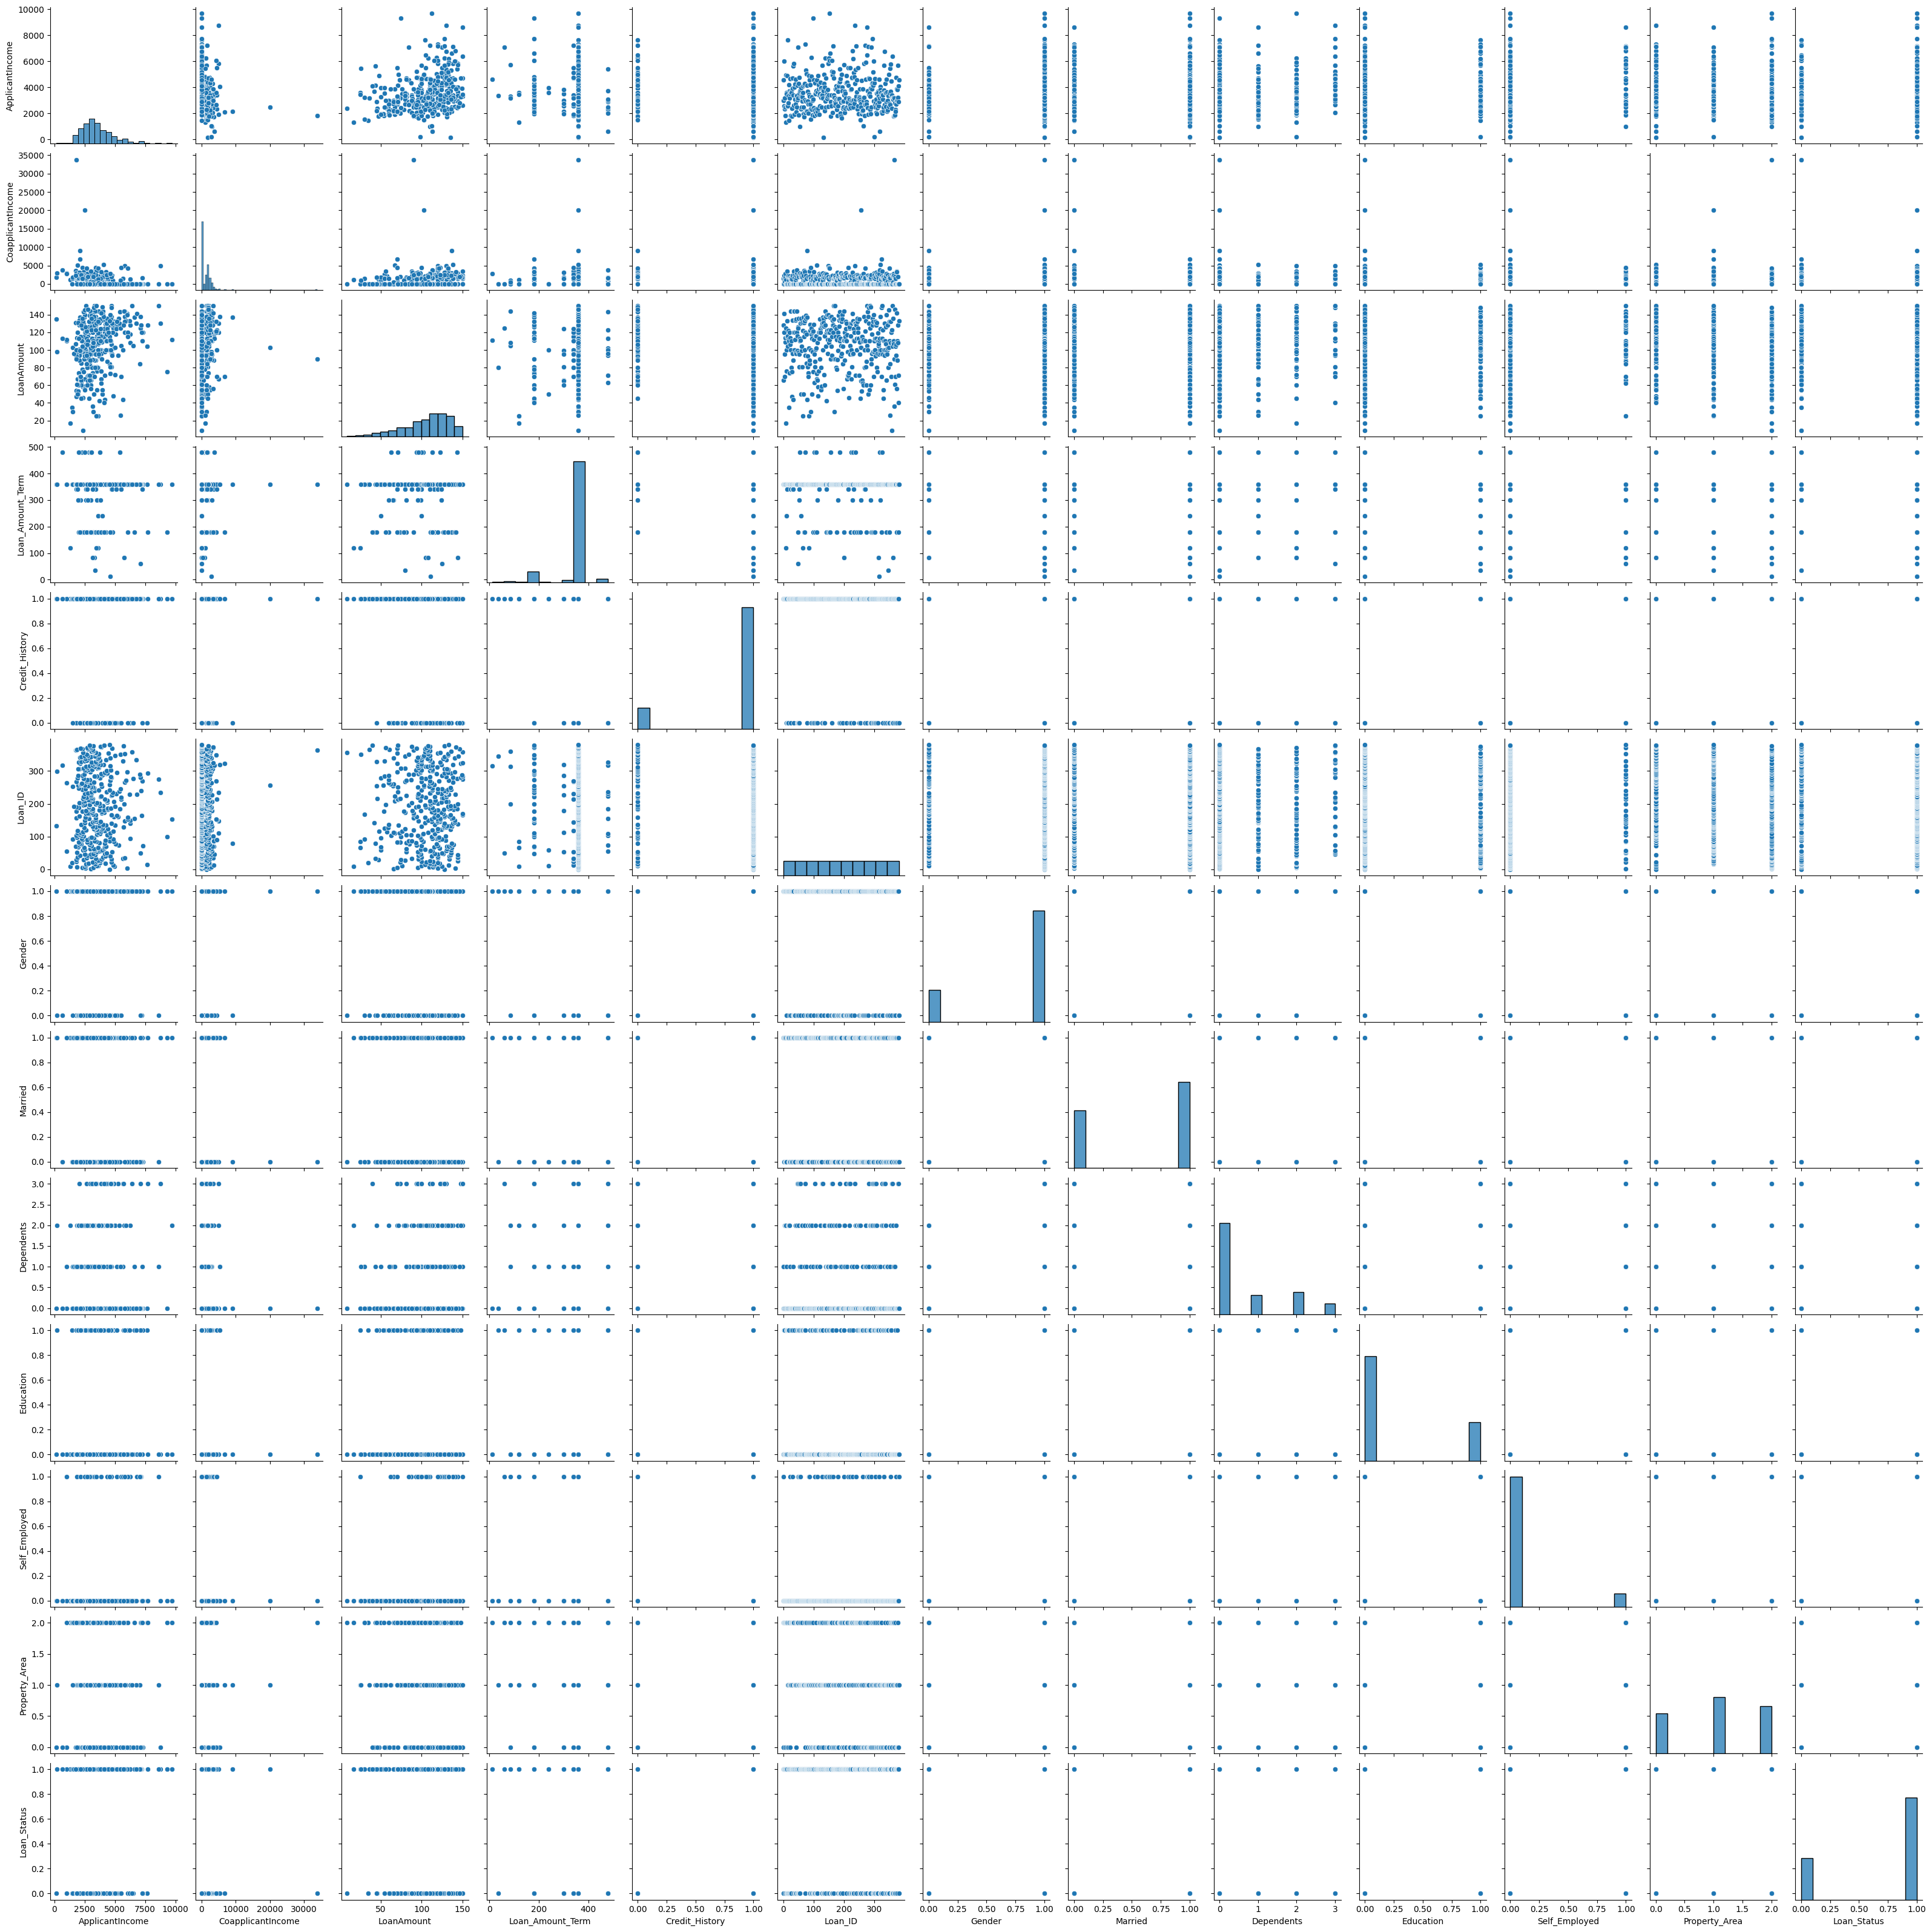

In [246]:
sns.pairplot(df)
plt.show()

#### Steps before applying Machine Learning Model

In [247]:
# Split data into dependent and independent variables
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [248]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0
1,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,1,2
2,2583,2358.0,120.0,360.0,1.0,2,1,1,0,1,0,2
3,6000,0.0,141.0,360.0,1.0,3,1,0,0,0,0,2
4,2333,1516.0,95.0,360.0,1.0,4,1,1,0,1,0,2


In [249]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [250]:
# Split data into Train and Test data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20,random_state = 3)

In [251]:
# Feature Scaling 
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.fit_transform(xtest)

### Step 5 : Build Model and Evaluate Performance of Model

#### Steps to build a model using user-defined function

In [252]:
def models(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(confusion_matrix(ytest,ypred))
    print(classification_report(ytest,ypred))
    return model

#### Create Instances for LogisticRegression, K-Nearest-Neighbor and Support Vector Machine Models

In [253]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()

#### LogisticRegression

###### Build and Evaluate LogisticRegression model

In [254]:
models(logreg)

[[18 10]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.83      0.98      0.90        49

    accuracy                           0.86        77
   macro avg       0.89      0.81      0.83        77
weighted avg       0.87      0.86      0.85        77



LogisticRegression()

#### Apply Hypertunning on LogisticRegression

In [255]:
lr = LogisticRegression(penalty = 'l2',solver = 'liblinear')
models(lr)

[[18 10]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.83      0.98      0.90        49

    accuracy                           0.86        77
   macro avg       0.89      0.81      0.83        77
weighted avg       0.87      0.86      0.85        77



LogisticRegression(solver='liblinear')

In [256]:
lr = LogisticRegression(penalty = 'l2',solver = 'sag')
models(lr)

[[18 10]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.83      0.98      0.90        49

    accuracy                           0.86        77
   macro avg       0.89      0.81      0.83        77
weighted avg       0.87      0.86      0.85        77



LogisticRegression(solver='sag')

In [257]:
lr = LogisticRegression(penalty = 'l2',solver = 'saga')
models(lr)

[[18 10]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.83      0.98      0.90        49

    accuracy                           0.86        77
   macro avg       0.89      0.81      0.83        77
weighted avg       0.87      0.86      0.85        77



LogisticRegression(solver='saga')

In [258]:
lr = LogisticRegression(penalty = 'l1',solver = 'liblinear')
models(lr)

[[18 10]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        28
           1       0.83      1.00      0.91        49

    accuracy                           0.87        77
   macro avg       0.92      0.82      0.85        77
weighted avg       0.89      0.87      0.86        77



LogisticRegression(penalty='l1', solver='liblinear')

In [259]:
lr = LogisticRegression(penalty = 'l1',solver = 'saga')
models(lr)

[[18 10]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        28
           1       0.83      1.00      0.91        49

    accuracy                           0.87        77
   macro avg       0.92      0.82      0.85        77
weighted avg       0.89      0.87      0.86        77



LogisticRegression(penalty='l1', solver='saga')

#### Evaluate Model using ROC-AUC metrics

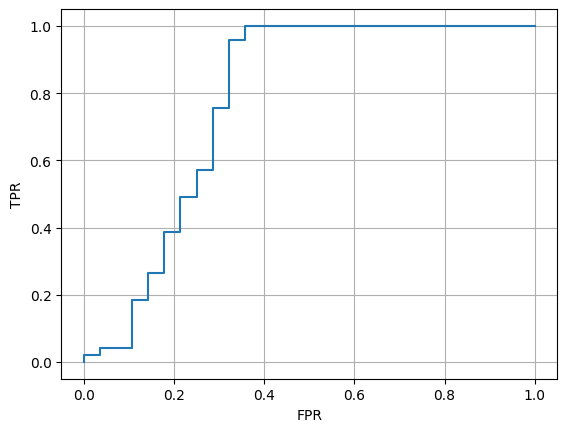

In [260]:
ypredprob = logreg.predict_proba(xtest)[:,1]
fpr,tpr,thresh = roc_curve(ytest,ypredprob)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)
plt.show()

In [261]:
lr = LogisticRegression(penalty = 'l1',solver = 'liblinear')
models(lr)

[[18 10]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        28
           1       0.83      1.00      0.91        49

    accuracy                           0.87        77
   macro avg       0.92      0.82      0.85        77
weighted avg       0.89      0.87      0.86        77



LogisticRegression(penalty='l1', solver='liblinear')

#### Sensitivity and Specificity of Logistic Regression model

In [262]:
# Sensitivity:
#TPR = TP / TP+FN
TPR = 49 / (49+10)
TPR

0.8305084745762712

In [263]:
# Specificity:
#TNR = TN / TN + FP
TNR = 18 / (18+0)
TNR

1.0

#### K-Nearest-Neighbor

###### Build and Evaluate K-Nearest-Neighbor model

In [264]:
models(knn)

[[ 7 21]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        28
           1       0.70      1.00      0.82        49

    accuracy                           0.73        77
   macro avg       0.85      0.62      0.61        77
weighted avg       0.81      0.73      0.67        77



KNeighborsClassifier()

#### Apply Hypertunning on K-Nearest-Neighbor

In [265]:
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors = i)
    print(i)
    models(knn)

1
[[14 14]
 [ 5 44]]
              precision    recall  f1-score   support

           0       0.74      0.50      0.60        28
           1       0.76      0.90      0.82        49

    accuracy                           0.75        77
   macro avg       0.75      0.70      0.71        77
weighted avg       0.75      0.75      0.74        77

2
[[18 10]
 [14 35]]
              precision    recall  f1-score   support

           0       0.56      0.64      0.60        28
           1       0.78      0.71      0.74        49

    accuracy                           0.69        77
   macro avg       0.67      0.68      0.67        77
weighted avg       0.70      0.69      0.69        77

3
[[ 8 20]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.89      0.29      0.43        28
           1       0.71      0.98      0.82        49

    accuracy                           0.73        77
   macro avg       0.80      0.63      0.63        77
weighted av

##### Here from above process 1 and 6 hypertunning values gives highest accuarcy

In [266]:
# Here Target values are even so here I select odd hypertunning value which is 1
np.sqrt(len(ytest))

8.774964387392123

##### Best Hypertunning value is 1

In [267]:
knn = KNeighborsClassifier(n_neighbors = 1)
models(knn)

[[14 14]
 [ 5 44]]
              precision    recall  f1-score   support

           0       0.74      0.50      0.60        28
           1       0.76      0.90      0.82        49

    accuracy                           0.75        77
   macro avg       0.75      0.70      0.71        77
weighted avg       0.75      0.75      0.74        77



KNeighborsClassifier(n_neighbors=1)

#### Sensitivity and Specificity of K-Nearest-Neighbor model.

In [268]:
# Sensitivity:
#TPR = TP / TP+FN
TPR = 44 / (44+14)
TPR

0.7586206896551724

In [269]:
# Specificity:
#TNR = TN / TN + FP
TNR = 14 / (14+5)
TNR

0.7368421052631579

#### Support Vector Machine

###### Build and Evaluate K-Nearest-Neighbor model

In [270]:
models(svm)

[[17 11]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.61      0.76        28
           1       0.82      1.00      0.90        49

    accuracy                           0.86        77
   macro avg       0.91      0.80      0.83        77
weighted avg       0.88      0.86      0.85        77



SVC()

#### Apply hypertunning on SVM

In [271]:
svm = SVC(kernel = 'linear')
models(svm)

[[18 10]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        28
           1       0.83      1.00      0.91        49

    accuracy                           0.87        77
   macro avg       0.92      0.82      0.85        77
weighted avg       0.89      0.87      0.86        77



SVC(kernel='linear')

In [272]:
svm = SVC(kernel = 'poly')
models(svm)

[[ 5 23]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.83      0.18      0.29        28
           1       0.68      0.98      0.80        49

    accuracy                           0.69        77
   macro avg       0.75      0.58      0.55        77
weighted avg       0.73      0.69      0.62        77



SVC(kernel='poly')

In [273]:
svm = SVC(kernel = 'sigmoid')
models(svm)

[[17 11]
 [ 2 47]]
              precision    recall  f1-score   support

           0       0.89      0.61      0.72        28
           1       0.81      0.96      0.88        49

    accuracy                           0.83        77
   macro avg       0.85      0.78      0.80        77
weighted avg       0.84      0.83      0.82        77



SVC(kernel='sigmoid')

In [274]:
grid = {'C' : [1,10],'gamma' : [1,10]}
gs = GridSearchCV(svm,grid,verbose = 3)
gs.fit(xtrain,ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ......................C=1, gamma=1;, score=0.705 total time=   0.0s
[CV 2/5] END ......................C=1, gamma=1;, score=0.754 total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1;, score=0.672 total time=   0.0s
[CV 4/5] END ......................C=1, gamma=1;, score=0.705 total time=   0.0s
[CV 5/5] END ......................C=1, gamma=1;, score=0.850 total time=   0.0s
[CV 1/5] END .....................C=1, gamma=10;, score=0.770 total time=   0.0s
[CV 2/5] END .....................C=1, gamma=10;, score=0.738 total time=   0.0s
[CV 3/5] END .....................C=1, gamma=10;, score=0.672 total time=   0.0s
[CV 4/5] END .....................C=1, gamma=10;, score=0.770 total time=   0.0s
[CV 5/5] END .....................C=1, gamma=10;, score=0.833 total time=   0.0s
[CV 1/5] END .....................C=10, gamma=1;, score=0.689 total time=   0.0s
[CV 2/5] END .....................C=10, gamma=1;,

GridSearchCV(estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [1, 10], 'gamma': [1, 10]}, verbose=3)

In [275]:
gs.best_params_

{'C': 1, 'gamma': 10}

In [276]:
svm = SVC(C = 1, gamma = 10)
models(svm)

[[ 0 28]
 [ 0 49]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.64      1.00      0.78        49

    accuracy                           0.64        77
   macro avg       0.32      0.50      0.39        77
weighted avg       0.40      0.64      0.49        77



SVC(C=1, gamma=10)

In [277]:
svm = SVC(kernel = 'linear')
models(svm)

[[18 10]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        28
           1       0.83      1.00      0.91        49

    accuracy                           0.87        77
   macro avg       0.92      0.82      0.85        77
weighted avg       0.89      0.87      0.86        77



SVC(kernel='linear')

#### Sensitivity and Specificity of Support Vector Machine model.

In [278]:
# Sensitivity:
#TPR = TP / TP+FN
TPR = 49 / (49+10)
TPR

0.8305084745762712

In [279]:
# Specificity:
#TNR = TN / TN + FP
TNR = 18 / (18+0)
TNR

1.0

## Conclusion:
#### Main goal of project is to predict loan status of customer based on various features.
#### Here are some steps which I covered :
### 1) Data Collection:
#####      Data collected from kaggle.com.
### 2) Data Understanding:
#####      Gets all detail information about dataset such as feature Name, data types, number of rows and columns,total size of dataset.
#####      i) Try to find null or missing values.
#####      ii) Checking outliers.
#####      iii) Finding Duplicate values.
### 3) Data Manipulation:
#####       i) Replaced missing values using imputation process.
### 4) Data Visualization:
#####       Here finding out some problem statements or insights in a datasets and visualize it.
### 5) Build Model:
#####       Logistic Regression,K-Nearest-Neighbor and Support Vector Machine.
### 6) Evaluation model:
#####       Calculated performance or accuarcy of a model.
#####       Try to compared accuracy of a models between Logistic Regression,K-Nearest-Neighbor and Support Vector Machine.
#####       In Logistic Regression, Sensitivity = 83% and Specificity = 100%
#####       In K-Nearest-Neighbor, Sensitivity = 75% and Specificity = 73%
#####       In Support Vector Machine, Sensitivity = 83% and Specificity = 100%
#####       Using Logistic Regression accuracy of a model is 87%.
#####       Using K-Nearest-Neighbor accuracy of a model is 75%.
#####       Using Support Vector Machine accuracy of a model is 87%.